<h1><center>Laboratorio 10: Interpretabilidad ü§ñ</center></h1>

<center><strong>MDS7202: Laboratorio de Programaci√≥n Cient√≠fica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebasti√°n Tinoco
- Ayudante: Arturo Lazcano, Angelo Mu√±oz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no ser√°n revisados

- Nombre de alumno 1: Nicol√°s Becerra
- Nombre de alumno 2: Sim√≥n Sanfeli√∫


### **Link de repositorio de GitHub:** https://github.com/SimonSanfeliu/MDS7202-BS/tree/L10

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcci√≥n del laboratorio](#Descripci√≥n-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificaci√≥n usando `XGBoost`.
- M√©todos Agn√≥sticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- M√©todos Agn√≥sticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisar√°n entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente ser√°n respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificaci√≥n con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificaci√≥n.

El laboratorio deber√° ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al m√°ximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante m√°s eficientes que los iteradores nativos sobre DataFrames.

## 1. Problemas Cl√≠nicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades cr√≥nicas, como la diabetes, decidi√≥ abrir una cl√≠nica especializada en el tratamiento de esta enfermedad en nuestro pa√≠s.

La cl√≠nica del Doctor Simi se convirti√≥ en un lugar donde los pacientes con diabetes podr√≠an recibir atenci√≥n m√©dica integral. El personal m√©dico estaba compuesto por especialistas en endocrinolog√≠a, nutrici√≥n y enfermer√≠a, todos capacitados en el manejo de la diabetes.

Sin embargo √©l se ha dado cuenta que los tiempos han cambiado y gracias a las tecnolog√≠as es posible generar mejores predicciones en la diabetes conociendo el historial m√©dico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus cl√≠nicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rog√≥ que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial m√©dico de las personas en forma de datos tabulares para que usted pueda realizar f√°cilmente la clasificaci√≥n.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0   4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1  12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2  13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3  11.0  1.0       1.0        1.0  28.0     1.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     0.0      1.0                0.0      3.0       5.0   
1           0.0     1.0      0.0                0.0      3.0       0.0   
2           1.0     1.0      1.0                0.0      1.0       0.0   
3           1.0     1.0      1.0                0.0      3.0       0.0   

   PhysHlth  DiffWalk  Stroke  HighBP  Diabetes  
0      30.0       0.0     0.0     1.0       0.0  
1       0.0       0.0     1.0     1.0       0.0  
2      10.0       0.0     0.0     0.0       0.0  
3       3.0       0.0     0.0     1.0       0.0

## 2. Clasificaci√≥n de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¬øEs acaso un buen predictor de diabetes?, ¬øQu√© buscan explicar las m√©tricas utilizadas?, ¬ølas m√©tricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elecci√≥n de las features?. 

In [2]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Funci√≥n para transformaci√≥n logar√≠tmica
def to_log(df_s):
    """
    Aplica una transformaci√≥n logar√≠timica a una serie de datos.

    Parameters
    ----------
    df_s : pd.Series
        Serie de datos a transformar.

    Returns
    -------
    pd.Series
        Serie de datos transformada. 
    """
    # Revisando datos
    assert type(df_s) == pd.DataFrame

    # Transformando los datos de la serie a escala logar√≠tmica
    df_s = df_s.apply(lambda x: np.log(x + 1))
    return df_s

In [4]:
# Obteniendo librer√≠as necesarias
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import itertools

# Definiendo la semilla
RANDOM_STATE = 42

# Separando el conjunto de datos
# Obteniendo X
X = df.copy()
X.drop(columns=["Diabetes"], inplace=True)
y = df["Diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=RANDOM_STATE, stratify=y)

# Separando los datos en num√©ricos y categ√≥ricos
num_cols = X_train.corr(numeric_only=True).columns.to_list()
cat_cols = [col for col in X_train.columns if not col in num_cols]

# Atributos num√©ricos
num_pipe = Pipeline([
                ('Logaritmic scaler', FunctionTransformer(to_log, feature_names_out='one-to-one')),
                ('MinMax scaler', MinMaxScaler())
            ])
# Atributos categ√≥ricos
cat_pipe = Pipeline([
    ('Encoder', OneHotEncoder(sparse_output=False))
])

# Creando ColumnTransformer
ctrans = ColumnTransformer(
        transformers=[
            ("Categorico", cat_pipe, cat_cols),
            ("Numerico", num_pipe, num_cols),
        ],
        remainder="passthrough",
        verbose_feature_names_out=False
)
ctrans.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('Categorico',
                                 Pipeline(steps=[('Encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 []),
                                ('Numerico',
                                 Pipeline(steps=[('Logaritmic scaler',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function to_log at 0x000002654A975AB0>)),
                                                 ('MinMax scaler',
                                                  MinMaxScaler())]),
                                 ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI',
                                  'Smoker', 'HeartDiseaseorAttack',
                                  'PhysActivity', 'Fruits', 'Veggies',
                                  'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
                                  'PhysHlth', 'DiffWalk', 'Stroke',
                                  'HighBP'])],
                  verbose_feature_names_out=False)

              precision    recall  f1-score   support

           0       0.70      0.77      0.74     10671
           1       0.79      0.73      0.76     12658

    accuracy                           0.75     23329
   macro avg       0.75      0.75      0.75     23329
weighted avg       0.75      0.75      0.75     23329



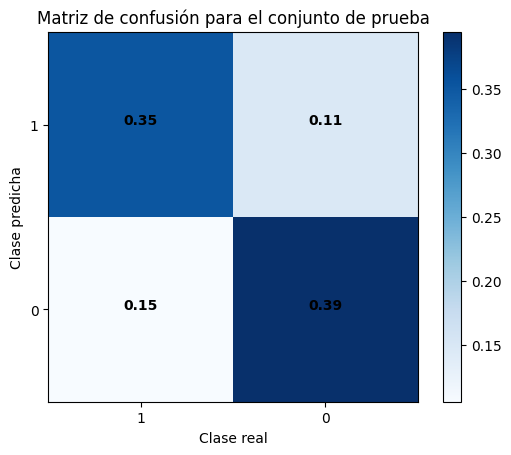

In [5]:
import xgboost as xgb

# Pipeline de entrenamiento
pipe_train = Pipeline([
    ("Scaling", ctrans),
    ("Classifier", xgb.XGBClassifier(objective='binary:logistic'))
])

# Entrenando
model = pipe_train.fit(X_train, y_train)

# Prediciendo en prueba
y_pred_test = model.predict(X_test)

# Reporte de clasificaci√≥n y matriz de confusi√≥n
print(classification_report(y_pred_test, y_test))
conf_mat2 = confusion_matrix(y_test, y_pred_test, normalize='all')
plt.imshow(conf_mat2, cmap=plt.cm.Blues)
plt.xticks([1,0], [0,1])
plt.yticks([1,0], [0,1])
plt.title("Matriz de confusi√≥n para el conjunto de prueba")
plt.xlabel("Clase real")
plt.ylabel("Clase predicha")
plt.colorbar()
for i,j in itertools.product(range(conf_mat2.shape[0]), range(conf_mat2.shape[1])):
    plt.text(i,j,round(conf_mat2[i,j], 2), horizontalalignment="center", color="black", weight="bold")

> Para el pipeline mostrado aqu√≠, se decidi√≥ tomar un clasificador XGBoost para poder hacer de forma correcta la clasificaci√≥n binaria pedida, especificando este tipo de clasificaci√≥n en sus par√°metros. Se decidi√≥ seguir el mismo pipeline del laboratorio anterior, teniendo un OneHotEncoder para las variables no num√©ricas y aplicando una transformaci√≥n logar√≠tmica junto con un MixMaxScaler para las num√©ricas, debido a la eficacia de √©ste y de los buenos resultados que ha entregado en laboratorios anteriores. Sin embargo, dada la gran cantidad de columnas num√©ricas con valores peque√±os, podr√≠a ser innecesario un preprocesamiento de estos datos tan exhaustivo, pero por convenci√≥n y eficiencia se deja de todos modos.

> Respecto a los resultados obtenidos, se probaron distintas configuraciones de par√°metros en el clasificador. Finalmente se prefiri√≥ dejar los valores por defecto y se pudo ver un accuracy en el F1 Score de 0.75. Esto implicar√≠a que el clasificador es es apropiado para predecir la diabetes en los pacientes, pero que puede mejorar su rendimiento.

> La *precision* muestra cu√°ntas predicciones correctas se hicieron de una clase dividido en cu√°ntas predicciones de esa clase se hicieron. Mientras m√°s alto el valor, mejor, teniendo que se tienen precisiones de 0.70 para la clase 0 (no diabetes) y 0.79 para la clase 1 (diabetes). Esto dar√≠a cuenta de que se predice mejor el que se tenga diabetes a predecir que no lo tiene (hay muchos falsos positivos en el caso de no tener diabetes).

> El *recall* es cu√°ntas predicciones correctas se hicieron de una clase dividido en cu√°ntos valores reales de √©sta hay en el dataset. Mientras m√°s alto, mejor, teniendo que el *recall* fue 0.77 para la clase 0 y 0.73 para la clase 1. Esto quiere decir que, mientras que dentro de sus propias predicciones, la clase 1 es mejor predicha, en el set de datos global, se predice mejor la clase 0 (hay m√°s falsos negativos de la clase 0).

> Finalmente, el F1 Score combina las dos m√©tricas anteriores, teniendo en consideraci√≥n ambos *trade-offs*. De esta forma, es una m√©trica muy global para definir la eficiencia de los modelos, de ah√≠ que se vea que la clase 1 tiene en ambos conjuntos un valor de 0.76 y la 0 de 0.74, indicando una mayor eficiencia del modelo a la hora de predecir que una persona tiene efectivamente diabetes; puesto que mientras m√°s ceracana al 1 esta m√©trica, mejor ser√° el modelo.

> Tomando esto en consideraci√≥n es que se usa el F1 Score para medir el rendimiento, notando que el *accuracy* total de los conjuntos en el F1 Score es de 0.75, lo que indica un gran rendimiento, pero que a√∫n puede mejorarse, ya que usualmente un modelo con *accuracy* (de todas las predicciones, cu√°ntas fueron correctas) sobre 0.7 es decente, pero no perfecto. Asimismo, las otras m√©tricas brindadas permiten dar cuenta de los buenos resultados que da el modelo, teniendo a todas sobre 0.7 y cercanas al 1 (la perfecci√≥n), denotando la eficiencia de √©ste y pudiendo entrever su eficiencia por clase.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para a√±adir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los m√©todos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¬øLos resultados obtenidos con los diferentes m√©todos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¬ølas importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza √°rboles? ¬øQu√© debilidad presenta este m√©todo?

Text(0.5, 1.0, "Feature Importance con importance_type='weight'")

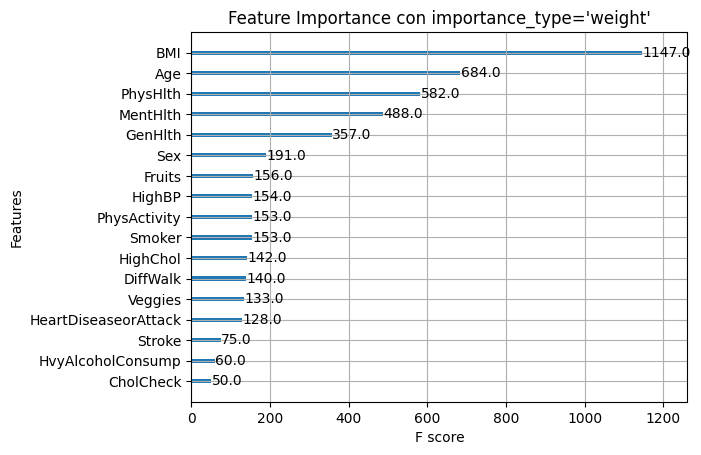

In [6]:
# Obteniendo el gr√°fico de importancia de los features para distintos tipos de c√°lculo de importancia
from xgboost import plot_importance
# M√©todo weight
plot_importance(model["Classifier"], importance_type="weight")
plt.title("Feature Importance con importance_type='weight'")

Text(0.5, 1.0, "Feature Importance con importance_type='cover'")

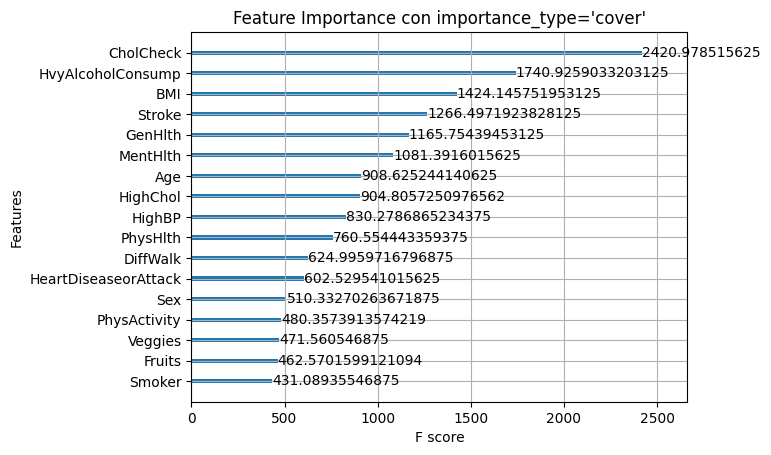

In [7]:
# M√©todo cover
plot_importance(model["Classifier"], importance_type="cover")
plt.title("Feature Importance con importance_type='cover'")

Text(0.5, 1.0, "Feature Importance con importance_type='gain'")

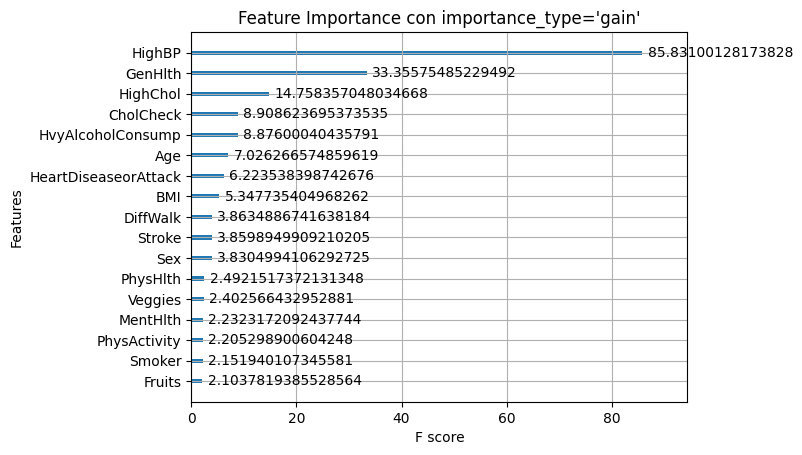

In [8]:
# M√©todo gain
plot_importance(model["Classifier"], importance_type="gain")
plt.title("Feature Importance con importance_type='gain'")

> Los resultados obtenidos son compatibles en el sentido de que todos se calculan en funci√≥n del n√∫mero de veces que se utiliza una caracter√≠stica para dividir un nodo en un √°rbol de decisi√≥n (el caso de XGBoost). La diferencia radica en c√≥mo se calcula este n√∫mero, lo que lleva a que las importancias vayan rotando. Esto implica que los distintos m√©todos permiten ver distintas maneras de c√≥mo se est√° dividiendo el √°rbol de decisi√≥n. Por ejemplo, *weight* define la importancia por la cantidad de veces que el feature aparece en un √°rbol, *cover* es la cantidad promedio de splits que cubre (n√∫mero de muestras afectadas por el split) la caracter√≠stica y *gain* es la ganancia promedio de splits que usan dicha caracter√≠stica. As√≠, se puede ver que los 3 m√©todos entregan distintas formas de ver la importancia de los features que son compatibles entre s√≠.

> Dado esto, es posible ver distintos niveles de importancia en cada uno de los gr√°ficos, variando el nivel de cada caracter√≠stica. En general, los resultados de *weight* y *cover* son similares, teniendo a BMI, GenHlth, MentHlth y Age entre las caracter√≠sticas m√°s importantes, pero estas var√≠an mucho m√°s en *gain*. Estas diferencias son esperables por c√≥mo se calculan las importancias, viendo que el m√©todo *weight* es similar al de *cover*.

> Para finalizar, las importancias obtenidas s√≥lo permiten ver la importancia de la caracter√≠stica para la precisi√≥n global del modelo, adem√°s de que ciertas variables tienen muchos valores posibles, lo que llevar√≠a a que siempre estas caracter√≠sticas sean importantes por el simple hecho de que hay m√°s formas de dividirlas. De esta forma, mientras que ayudan a entender la importancia de los features para un modelo de √°rboles, no pueden permiten encontrar la interpretabilidad completa del modelo, dada la sensibilidad de estos m√©todos ante valores variados dentro de las caracter√≠sticas.

## 4. M√©todos Agn√≥sticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la secci√≥n anterior, Dr. Simi le pide implementar un **m√©todo de permutaci√≥n** que le permita observar la importancia de las features. Visualice los resultados de este m√©todo en un gr√°fico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviaci√≥n est√°ndar de sus resultados (¬øQu√© se√±ala est√°?). Adem√°s, responda las siguientes preguntas:


- ¬øC√≥mo mide la importancia de las features su propuesta?
- ¬øQu√© features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¬øTienen sentido?
- ¬øC√≥mo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del m√©todo implementado.

In [9]:
# Aplicando el m√©todo de permutaci√≥n
from sklearn.inspection import permutation_importance
result = permutation_importance(model["Classifier"], X_test, y_test, n_repeats=30, random_state=RANDOM_STATE)
print(f"Desviaciones est√°ndar de la importancia: {result['importances_std']}")

Desviaciones est√°ndar de la importancia: [0.         0.00080672 0.00072748 0.00056938 0.         0.00113714
 0.00077104 0.00090354 0.00128816 0.00089503 0.00044349 0.
 0.00127041 0.00148629 0.00075542 0.00055625 0.00162949]


Text(0.5, 0, 'Error')

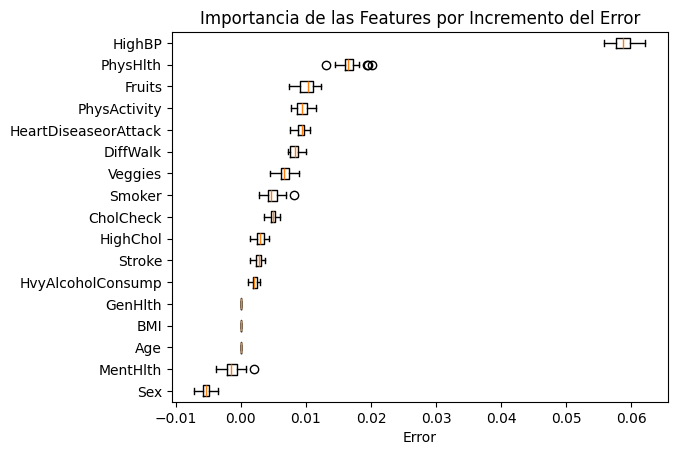

In [10]:
# Graficando los resultados anteriores
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X_test.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')

> Las desviaciones est√°ndar se√±alan cu√°nto var√≠a la importancia de cada feature.

> La propuesta mide la importancia como la resta entre el error basado en las predicciones del conjunto de datos permutado y el error basado en las predicciones del conjunto original (sin permutar).

> Las 5 caracter√≠sticas que tuvieron un mayor impacto en la salida del modelo fueron HighBP (presi√≥n alta), PhysHlth (salud f√≠sica), Fruits (consumo regular de frutas), PhysActivity (realiza actividad f√≠sica) y HeartDiseaseorAttack (historial de enfermedades card√≠acas o paros card√≠acos). Es razonable que estas sean las m√°s importantes para definir si un paciente tiene o no diabetes, sobre todo la tipo 2, ya que permitir√≠a definir los h√°bitos del paciente que llevar√≠an a evitar que √©ste contrayera la condici√≥n. Asimismo, estas caracter√≠sticas permiten, valga la redundanica, caracterizar a la personas diab√©ticas, puesto que para aquellas que tengan tipo 1 tendr√°n √©stas bastante afectadas ya.

> Las features aqu√≠ enlistadas tienen mucho m√°s sentido que las vistas en los otros gr√°ficos, puesto que destacan s√≠ntomas espec√≠ficos de personas que padecen de diabetes por sobre caracter√≠sticas generales de las personas. Asimismo, se puede ver que distintas features que antes eran muy importantes (como BMI y Age), resulta ser que tienen una desviaci√≥n en su importancia de 0, por lo que son igual de no importantes para todo el dataset. Son intransigentes, por lo que este m√©todo permite tener una visi√≥n global mucho m√°s completa.

> Ventajas:
> - F√°cil interpretaci√≥n: Permite ver gr√°fica y num√©ricamente cu√°les features son las m√°s importantes.
> - Alta compresi√≥n de interpretabilidad global: permite ver de forma concisa el desempe√±o global de cada caracter√≠stica, como se mencion√≥ anteriormente. As√≠, es m√°s sencillo y m√°s general el llevar a cabo la interpretaci√≥n.
> - No necesita re-entrenar el modelo: Se le puede entregar un modelo entrenado y evaluar √©ste directamente en el conjunto de prueba, disminuyendo as√≠ los tiempos de ejecuci√≥n considerablemente para poder interpretar.

> Desventajas:
> - Enlazado al error del modelo: Como la importancia se calcula en base al error, si se tiene un modelo deficiente, las importancias calculadas ser√°n en base a la deficiencia de √©ste, lo que no permitir√≠a una buena interpretaci√≥n.
> - Si las features est√°n correlacionadas puede generar sesgos por entradas poco realistas: Al tener caracter√≠sticas correlacionadas, la permutaci√≥n no llevar√° a tener muchos cambios en el error, lo que llevar√≠a a tener sesgos en la importancia de estos features.
> - A√±adir una feature correlacionada puede decrecer la importancia de una feature asociada al separar la importancia en las dos features: Precisamente por lo comentado anteriormente, como el error no variar√° tanto, esto llevar√° a que estas caracter√≠sticas tengan una menor importancia (menor diferencia de errores).

## 5. M√©todos Agn√≥sticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber c√≥mo funciona el modelo de predicci√≥n a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmac√©utico le pide calcular los *shap values* de su modelo. ¬øQu√© representa cada n√∫mero en su resultado? ¬øEs posible atribuir un significado a la positividad/negatividad de cada valor?

In [11]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable

In [12]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [13]:
# Calculando los shap values teniendo en cuenta que boosting son √°rboles
import shap

# Calculando los valores
explainer = shap.TreeExplainer(model["Classifier"])
shap_values = explainer(X)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[20:25:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [14]:
# Viendo los valores
shap_values

.values =
array([[ 0.158132  , -0.10326613, -0.40514246, ..., -0.10215715,
        -0.01333452,  0.5722986 ],
       [ 0.28572232, -0.24236968,  0.24049461, ..., -0.07376755,
         0.19350985,  0.5522304 ],
       [ 0.22512576, -0.00592881, -0.27613813, ..., -0.11459348,
        -0.03089161, -0.6499026 ],
       ...,
       [ 0.03109661,  0.12961714,  0.21607704, ..., -0.01302011,
        -0.02686371,  0.517731  ],
       [ 0.03976111,  0.06480618,  0.17090622, ..., -0.0467571 ,
        -0.03218078,  0.4992999 ],
       [-0.19199596,  0.11557759,  0.27337304, ..., -0.07578182,
        -0.03370389,  0.38997793]], dtype=float32)

.base_values =
array([-0.00817224, -0.00817224, -0.00817224, ..., -0.00817224,
       -0.00817224, -0.00817224], dtype=float32)

.data =
array([[ 4.,  1.,  0., ...,  0.,  0.,  1.],
       [12.,  1.,  1., ...,  0.,  1.,  1.],
       [13.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [13.,  0.,  1., ...,  1.,  0.,  1.],
       [11.,  0.,  1., ...,  1.,  0.

In [15]:
# Instancia de ejemplo
shap_values.values[1,:]

array([ 0.28572232, -0.24236968,  0.24049461,  0.01405665,  0.1921069 ,
       -0.08493321, -0.07776659,  0.11883271, -0.05053177,  0.10707276,
        0.02110081,  0.68238205,  0.01911099, -0.10405093, -0.07376755,
        0.19350985,  0.5522304 ], dtype=float32)

> Los base_values corresponden al valor esperado de la predicci√≥n si no tuviera informaci√≥n sobre las features. Se utiliza como punto de referencia para calcular los shap values. Los shap values corresponden a la contribuci√≥n de cada feature para la predicci√≥n del modelo. Si el valor es positivo, la feature contribuye a aumentar la predicci√≥n, mientras que si es negativo, contribuye a disminuirla.

### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¬øQu√© variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¬øExiste alg√∫n patr√≥n com√∫n entre las instancias analizadas? 
- ¬øEs posible generalizar estas conclusiones a todo el dataset?

In [16]:
# Graficando los shap_values por variable
idx = 1

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                X.iloc[idx,:],
                link="logit")

In [17]:
idx = 9

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                X.iloc[idx,:],
                link="logit")

In [18]:
idx = 150

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                X.iloc[idx,:],
                link="logit")

> En general, se puede ver que los niveles de salud (f√≠sica y general) afectan de forma positiva a la obtenci√≥n de diabetes cuando estos son valores intermedios/bajos, viendo adem√°s que el tener historiales m√©dicos complejos (como haber tenido paros cardi√°cos, accidentes cerebrovasculares) o h√°bitos poco saludables (como un bajo nivel de actividad f√≠sica) tambi√©n afectan de forma positiva. En general, se ve que no tener presi√≥n alta ni el colestrol alto y comer de forma saludable afectan de forma negativa el poseer diabetes. Todo esto hace sentido respecto a lo que se sabe de la diabetes.

> Lo anterior se interpreta de las instancias vistas, pero notando que no en todas se tiene el mismo factor de importancia para cada feature, por lo que no hay un patr√≥n 100% claro, s√≥lo nociones generales. Dado esto √∫ltimo, no es directo poder generalizar las conclusiones a todo el dataset, ya que cada instancia asigna distintas importancias a cada caracter√≠stica; adem√°s de que de 3 instancias no es posible generalizar el comportamiento de todo el dataset.

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualizaci√≥n donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¬øQu√© diferencias existen con las conclusiones generadas a nivel de instancia?

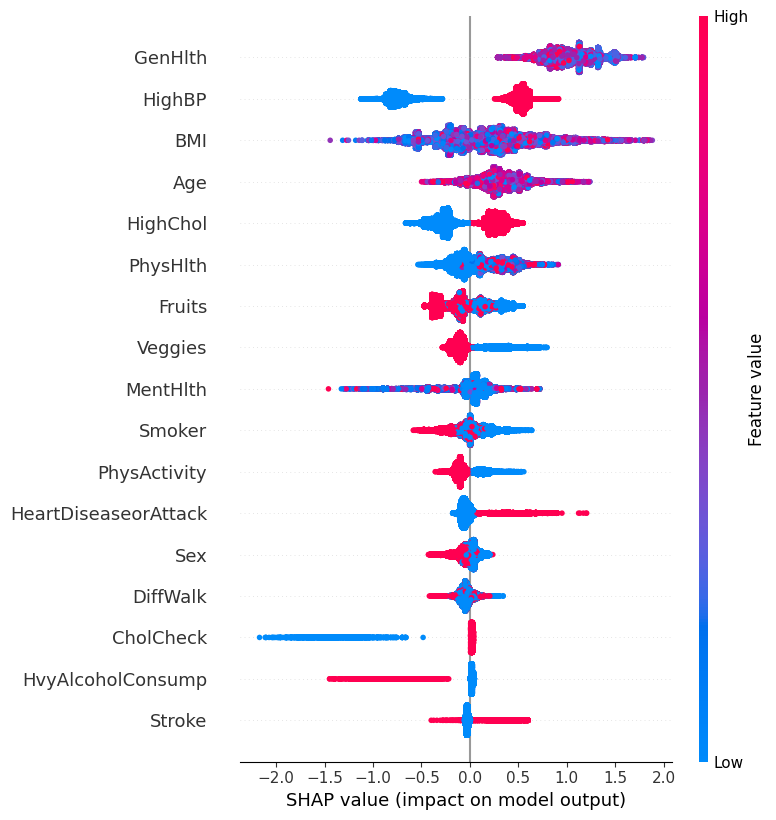

In [19]:
# Aporte global
shap.summary_plot(shap_values, X)

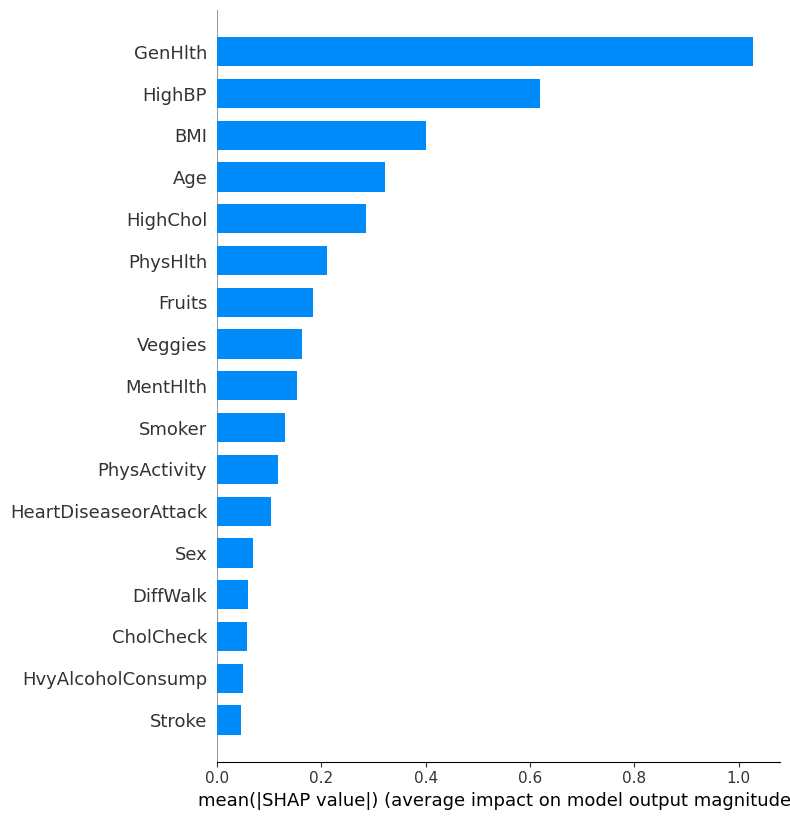

In [21]:
# Aporte global (con barras)
shap.summary_plot(shap_values, X, plot_type='bar')

> El aporte global muestra como, en promedio, afecta cada feature a la predicci√≥n en cada instancia. As√≠, se puede ver que las caracter√≠sticas m√°s importantes en impacto promedio al output del modelo, teniendo a *GenHlth*, *HighBP*, *BMI*, *Age*, *HighChol* y *PhysHlth* como las m√°s importantes. Podemos ver adem√°s que, en el primer gr√°fico, existen algunos features con shap values bastante dicot√≥micos entre los m√°s influyentes, como es el caso de *HighBP*, *HighChol* y *PhysHlth*, que tienen valores muy positivos o muy negativos separados entre alto o bajos. Esto provoca que a nivel de instancia existan ordenes de impacto diferentes, ya que, por ejemplo, en la instancia 1, *HighBP* es la segunda caracter√≠stica m√°s importante positivamente, pero en en la instancia 9 se vuelve un aporte negativo. Por ende, a nivel de instancia existir√°n casos donde esta prioridad se vea mermada junto con un cambio en el aporte de la predici√≥n, aunque en general *GenHlth* y *BMI* son las caracter√≠sticas importantes con un mayor impacto positivo en la predicci√≥n.

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gr√°fico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¬øQu√© puede concluir de sus resultados?

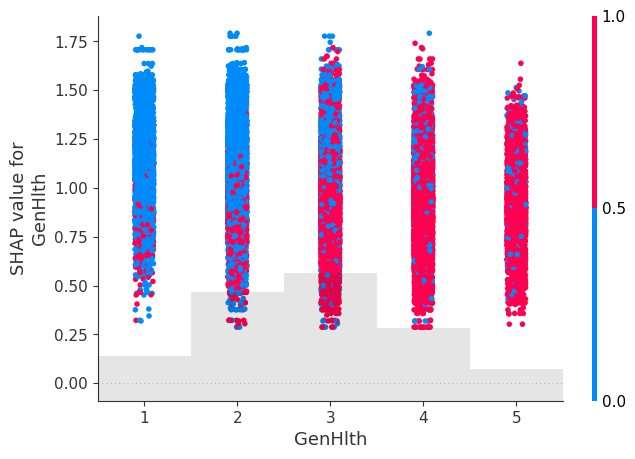

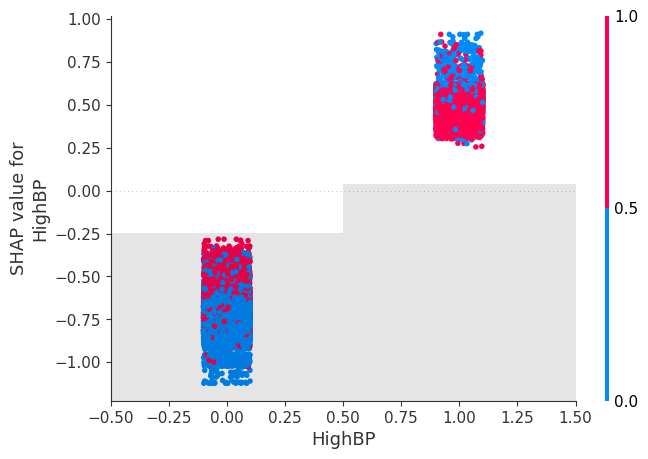

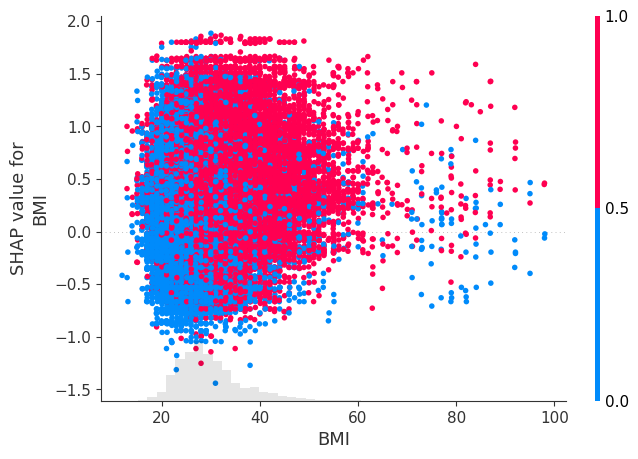

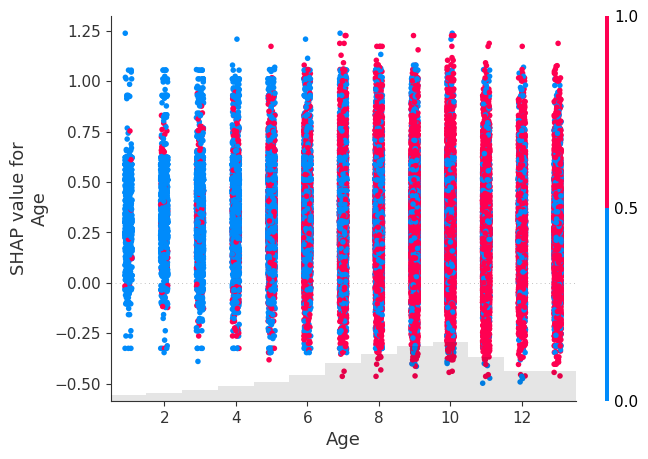

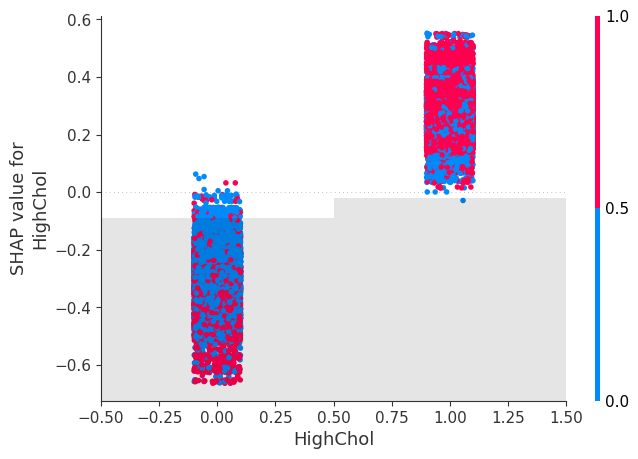

In [23]:
# Obteniendo los features en orden de importancia
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

# Obteniendo predicciones sobre todo el conjunto (igual que los SHAP values)
y = model.predict(X)

# Graficando los 5 primeros features
for name in feature_importance_names[:5]:
    shap.plots.scatter(shap_values[:,name], 
                   color=y)

> De los gr√°ficos obtenidos, es posible ver que hay m√°s probabilidades de poseer diabetes al tener una salud general entre 4 y 5 (la m√°s alta), tener la presi√≥n alta, tener BMI's altos (muy por fuera del rango saludable, sobre todo), ser mayor (en este caso, los grupos etarios entre 9 y 12, esto es, de 60 a√±os para arriba) y tener el colesterol alto. Es esperable que, al tener el colesterol y la presi√≥n alta, sea m√°s probable tener diabetes, puesto que son partes de los s√≠ntomas de √©sta (y viceversa para no poseer, en este caso); junto con tener BMI's altos y fuera del rango saludable, ya que esto representa un poco cuidado de la salud lo que llevar√≠a a la aparici√≥n de diabetes tipo 2. Siguiendo esta l√≠nea, si es que se tienen estos malos h√°bitos de salud, entonces para que la diabetes tipo 2 aparezca, deben pasar varios a√±os desde que se lleven a cabo, de ah√≠ que son los rangos etarios m√°s antiguos quienes son m√°s probables de poseerla. Finalmente, puesto que los valores altos en la salud general indican una mala salud, tambi√©n sigue la misma narrativa descrita hasta ahora.

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gr√°fico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¬øQu√© relaci√≥n existe entre la salida promedio del modelo y cada feature analizada? ¬øSon estas conclusiones generalizables para todo el conjunto de datos?

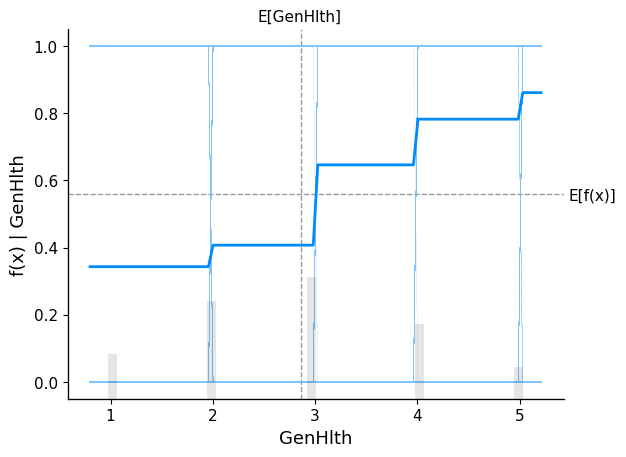

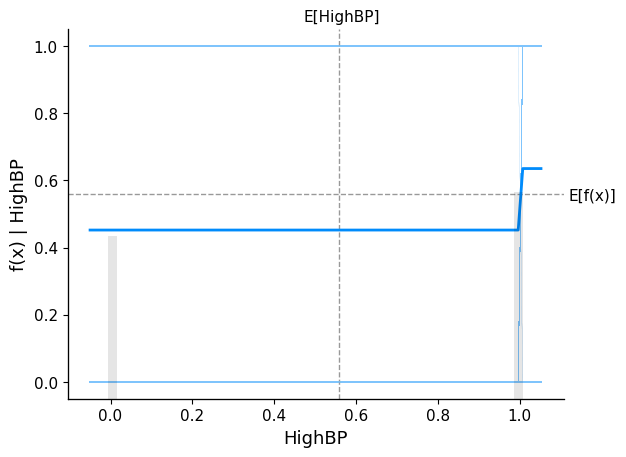

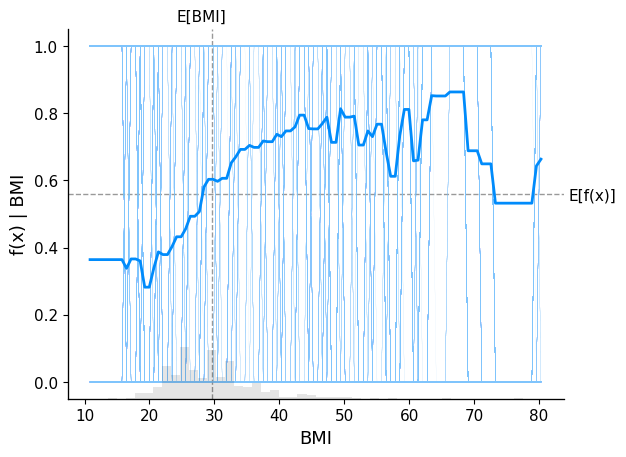

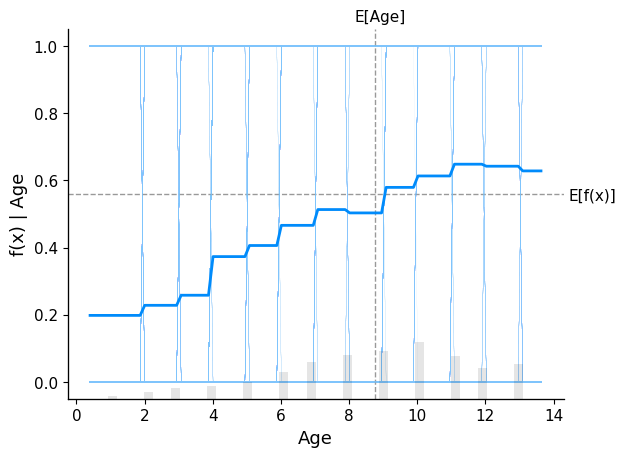

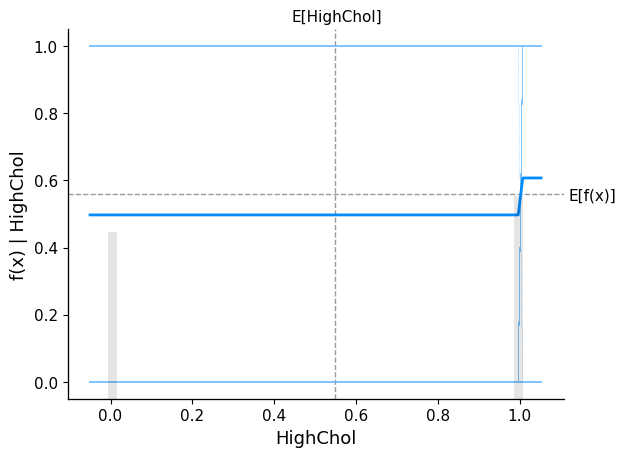

In [24]:
# Obteniendo gr√°fico PDP
X1000 = shap.utils.sample(X, 1000)

# Graficando los 5 primeros features
for name in feature_importance_names[:5]:
    shap.partial_dependence_plot(
        name, model.predict, X1000, model_expected_value=True,
        feature_expected_value=True, ice=True
    )

> Al interpretar los gr√°ficos PDP, tenemos un comportamiento de tipo pseudo-linear monotono para la mayor√≠a de las variables, es decir, el valor esperado aumenta junto con el crecimiento de la categor√≠a. La variable BMI presenta un comportamiento algo m√°s complejo, lo cual se condice con los valores de normalidad de este √≠ndice, ya que el valor esperado de padecer diabetes aumenta dr√°sticamente una vez superado el BMI 25. Con la edad tambi√©n se destaca una gran dependencia, notando que el creciemiento de la probabilidad de padecer diabetes es m√°s pronunciado en los rangos de edad m√°s bajos y se empieza a apaciguar luego del valor esperado. Para los otros casos, los categ√≥ricos, tambi√©n se condice bien esta dependencia: a mayor presi√≥n, colesterol y menor salud f√≠sica, mayor probabilidad de padecer diabetes.
Sin embargo, no es posible generalizar estas conclusiones para todo el conjunto de datos, ya que se est√° trabajando con una submuestra de 1000 observaciones, lo cual puede sesgar los resultados. Adem√°s, se est√° trabajando con un modelo de √°rboles, el cual es muy sensible a la distribuci√≥n de los datos, por lo que los resultados pueden variar mucho dependiendo de la submuestra y adem√°s, podr√≠an estar ocultos los efectos heterog√©neos de las variables.

## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Despu√©s de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisi√≥n tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas se√±ale a **cu√°nta poblaci√≥n** es posible explicar con estas reglas e indique la **precisi√≥n** que poseen las reglas en la totalidad de los datos. ¬øTienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta se√±alando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [22]:
!pip install alibi

Defaulting to user installation because normal site-packages is not writeable


In [27]:
# Aplicando las reglas
from alibi.explainers import AnchorTabular

predict_fn = lambda x: model["Classifier"].predict(x)
explainer = AnchorTabular(predict_fn, model["Classifier"].feature_names_in_, seed=1)
explainer.fit(X_train.to_numpy())

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 1, 'disc_perc': (25, 50, 75)},
  'version': '0.9.4'}
)

In [29]:
idx = 1000
# explicar predicci√≥n idx 1000

explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Anchor: Fruits <= 0.00 AND MentHlth <= 0.00
Precision: 0.99
Coverage: 0.26


> Para este paciente, las reglas aplicadas fueron que no consumiera frutas diariamente y que no tuviera d√≠as de mala salud mental, resultando en una precisi√≥n del 99% y una cubertura del 26%. Esto implicar√≠a que este set de reglas cubre muy poca poblaci√≥n de pacientes, pero es extremadamente precisa al momento de determinar si una persona posee diabetes.

In [30]:
idx = 3001
# explicar predicci√≥n idx 3001

explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Could not find an anchor satisfying the 0.95 precision constraint. Now returning the best non-eligible result. The desired precision threshold might not be achieved due to the quantile-based discretisation of the numerical features. The resolution of the bins may be too large to find an anchor of required precision. Consider increasing the number of bins in `disc_perc`, but note that for some numerical distribution (e.g. skewed distribution) it may not help.


Anchor: Sex <= 0.00 AND BMI > 33.00 AND HighBP <= 1.00 AND HvyAlcoholConsump <= 0.00 AND DiffWalk <= 1.00 AND Smoker <= 1.00 AND Veggies <= 1.00 AND PhysActivity <= 1.00 AND HighChol <= 1.00
Precision: 0.93
Coverage: 0.14


> Como no se pudo obtener una precisi√≥n sobre 95%, se entrega el siguiente mejor resultado, con un 93% de precisi√≥n y una cubertura del 14% de la poblaci√≥n. El set de reglas para este paciente fueron las siguientes: que fuese mujer, tener un BMI superior a 33 y que no tuviera un alto consumo de alcohol. Los valores binarios con reglas <= 1.0 indicar√≠an que da lo mismo qu√© se hace con esta variable, ya que puede ser cualquier valor (en este caso, es irrelevante el que fume, el que coma vegetales regularmente, el que haga actividad f√≠sica, el que tenga el colesterol alto, el que tenga dificultades para caminar y el que tenga la presi√≥n alta). Similar al paciente anterior, el *anchor* generado resulta ser muy espec√≠fico, ya que cubre una fracci√≥n muy peque√±a de la poblaci√≥n, aunque a una alta precisi√≥n.

In [31]:
idx = 5751
# explicar predicci√≥n idx 5751

explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Anchor: HighBP > 0.00
Precision: 0.99
Coverage: 0.56


> Para el √∫ltimo paciente, la √∫nica regla establecida es que tenga la presi√≥n alta, lo que cubre un 56% de la poblaci√≥n con un 99% de precisi√≥n. Esta regla pareciera ser la m√°s eficiente de todas, puesto que predice muy bien qui√©n posee diabetes en un gran grupo de la poblaci√≥n (m√°s de la mitad).

> La regla que hace m√°s sentido es la del √∫ltimo paciente, puesto que de los an√°lisis anteriores se sabe que la presi√≥n alta es una de las caracter√≠sticas m√°s importantes para definir si un paciente posee diabetes dado que es un s√≠ntoma de estos. Esto puede evidenciarse en la alta precisi√≥n de esta regla, sumado a la gran cobertura que tiene en la poblaci√≥n, permitiendo as√≠ generalizar mejor a partir de un s√≥lo punto ciertas caracter√≠sticas del dataset.

> Por otra parte, las reglas establecidas para el paciente 3001 no parecen ser para nada √∫tiles, ya que resultan redundantes y muy espec√≠ficas, con caracter√≠sticas que se sabe que no son tan relevantes. Esto se ve particularmente con que tiene la precisi√≥n m√°s baja de todas y de que adem√°s tiene la menor cobertura, por lo que explicar√≠a una menor cantidad de datos. 

> Esto √∫ltimo tambi√©n ocurre con el primer set de reglas, teniendo una cobertura muy baja, aunque de alta precisi√≥n, por lo que no permitir√≠a analizar a grandes rasgos el dataset. Esto tambi√©n se deber√≠a a que se tienen reglas muy espec√≠ficas a caracter√≠sitcas que se sabe que no son tan importantes.

# Retrospectiva... (1.0 puntos)

En base a los diferentes m√©todos que implementa y ha comentado en este laboratorio, comente qu√© m√©todos le permiten entregar mejores conclusiones para la tarea de clasificaci√≥n de diabetes. Por otro lado, ¬øqu√© m√©todos son m√°s √∫tiles para el problema del doctor Simi, m√©todos agnosticos locales o globales?

> Fundamente su Respuesta aqu√≠

# Conclusi√≥n
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>